<a href="https://colab.research.google.com/github/ForooghGharibiMonfared/Price_Prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

**making our data**
First we use "concat code to make our new csv tabel as you see



In [ ]:
#pd2=pd.read_csv("/content/sample_data/price prediction/all_stocks_5yr.csv")
pd1= pd.concat([pd.read_csv("/content/Tesla.csv - Tesla.csv.csv"), pd.read_csv("/content/AMD.csv"),pd.read_csv("/content/AMD.csv")], ignore_index=True)
pd1.head()
# sort ='False'


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


We can also do it in different way as you see

In [ ]:
#pd1=pd.read_csv("/content/Tesla.csv - Tesla.csv.csv")
#pd2=pd.read_csv("/content/GOOGL.csv")
#pd3=pd.read_csv("/content/AMD.csv")
#pd1.append(pd.read_csv("/content/GOOGL.csv"))
#pd1.append(pd.read_csv("/content/AMD.csv"))
#pd1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


So we use append code and you see we have less problem.



In [ ]:
pd1.describe()

,Open,High,Low,Close,Volume,Adj Close
count,6362.000000,6362.000000,6362.000000,6362.000000,6.362000e+03,6362.000000
mean,39.946768,40.660803,39.198169,39.942224,2.394623e+07,39.942224
std,73.997611,75.201209,72.733226,73.995184,2.677485e+07,73.995184
min,1.620000,1.690000,1.610000,1.620000,0.000000e+00,1.620000
25%,3.890000,3.970000,3.830000,3.890000,7.269475e+06,3.890000
50%,7.670000,7.860000,7.530000,7.670000,1.627120e+07,7.670000
75%,23.087500,23.662500,22.557499,23.022500,3.103020e+07,23.022500
max,287.670013,291.420013,280.399994,286.040009,3.250584e+08,286.040009


In [ ]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362 entries, 0 to 6361
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6362 non-null   object 
 1   Open       6362 non-null   float64
 2   High       6362 non-null   float64
 3   Low        6362 non-null   float64
 4   Close      6362 non-null   float64
 5   Volume     6362 non-null   int64  
 6   Adj Close  6362 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 348.0+ KB


Since for a portfolio we must decided about our shares and bond in the closing time each day. We work on Closing price here now we try to make a visulaisation about our data.

<font color="red"> As what was described in our data set the **column Adj Close** is "The  stock's closing price that has been amended to include any distributions/corporate actions that occurs **before next days open**"

Text(0.5, 1.0, 'Closing Price of stock')

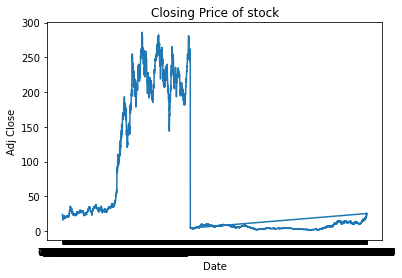

In [ ]:
#pd1['Adj Close'].plot()
plt.plot(pd1['Date'], pd1['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title("Closing Price of stock")

We also want to show by diagram that how many shares are traded. It is in Volume column.

Text(0.5, 1.0, 'amount of trading shares')

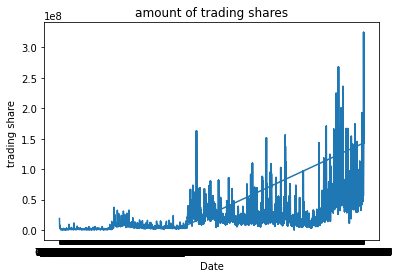

In [ ]:
plt.plot(pd1['Date'], pd1['Volume'])
plt.ylabel('trading share ')
plt.xlabel('Date')
plt.title("amount of trading shares")

Now for each 10, 20 and 50 days we find our mean of price and append them to our tabel. Then we want to show thier difference in one figure.

In [ ]:
day = [10, 20, 50]

for i in day:
        column_name = f"i for {i} days"
        pd1[column_name] = pd1['Adj Close'].rolling(i).mean()

In [ ]:
print(pd1.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'i for 10 days', 'i for 20 days', 'i for 50 days'],
      dtype='object')


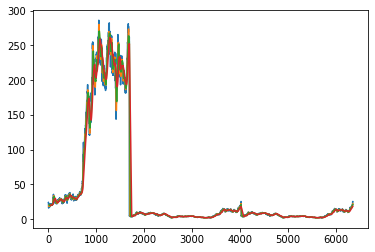

In [ ]:
plt.plot(pd1['Adj Close'])
plt.plot(pd1['i for 10 days'])
plt.plot(pd1['i for 20 days'])
plt.plot(pd1['i for 50 days'])
plt.show()

in the continous we will go deeper to find daily return for our stockes it will a moddel for our risk.

Now we want to find our daily return distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


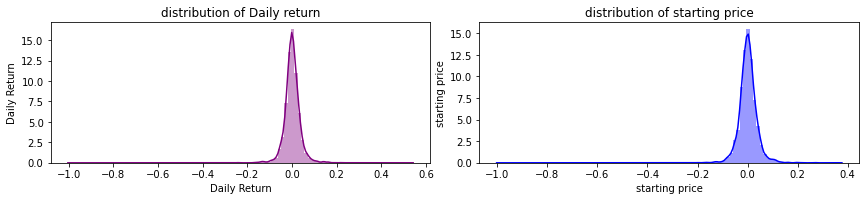

In [ ]:
plt.figure(figsize=(12, 5))

pd1['Daily Return'] = pd1['Adj Close'].pct_change()
pd1['starting price'] = pd1['Open'].pct_change()

plt.subplot(2, 2, 1)
sns.distplot(pd1['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('distribution of Daily return' )

plt.subplot(2, 2, 2)
sns.distplot(pd1['starting price'].dropna(), bins=100, color='blue')
plt.ylabel('starting price')
plt.title('distribution of starting price' )

plt.tight_layout()

 Now as we see their distribution is so the same normal distribution.

<font color="red"> Now we want to predict opening price of our company stock price by LSTM algorithm.

TO this WE  split our data to two seperate part one for training and next for test to this first normalizie our data by scaling them to do this we use a special commend of Python


```
from sklearn.preprocessing import MinMaxScaler
```







In [ ]:
#our column we need it for plotting
pd1_without= pd1.filter(['Open'])
pd1_without

,Open
0,19.000000
1,25.790001
2,25.000000
3,23.000000
4,20.000000
...,...
6357,21.190001
6358,22.910000
6359,24.940001
6360,25.510000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#first find "open" as a vector to scale it
pd1_new= pd1.iloc[:,1:2].values
#start scaling
sca = MinMaxScaler(feature_range=(0,1))
scaled_data = sca.fit_transform(pd1_new)

scaled_data

array([[0.06075861],
       [0.08449572],
       [0.08173396],
       ...,
       [0.08152421],
       [0.08351686],
       [0.07949659]])

We want to find training data amount to make training and test i search and find a special formula to find training length.

```
  int(np.ceil( len(dataset)  .95 ))
```
By this formula we choose 95 percent of our column for training set.


In [ ]:
train_len = int(np.ceil( len(scaled_data ) * .95 ))

train_len

6044

Now we make a training vector.

In [ ]:
# Create the training data set
train_data = scaled_data[0:int(train_len), :]

Now we make a Creating a data structure with 60 timesteps and 1 output.

In [ ]:

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


<font color='red'> Now we are ready to make our **LSTM**  structure.

First Importing the *Keras libraries* and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Now we make our LSTM strucutre as follow. We have 4 LSTM layer and an out put layer. I choosed this structure by studing some LSTM algorithm and the number of my training features.

I try different structure it is one of my try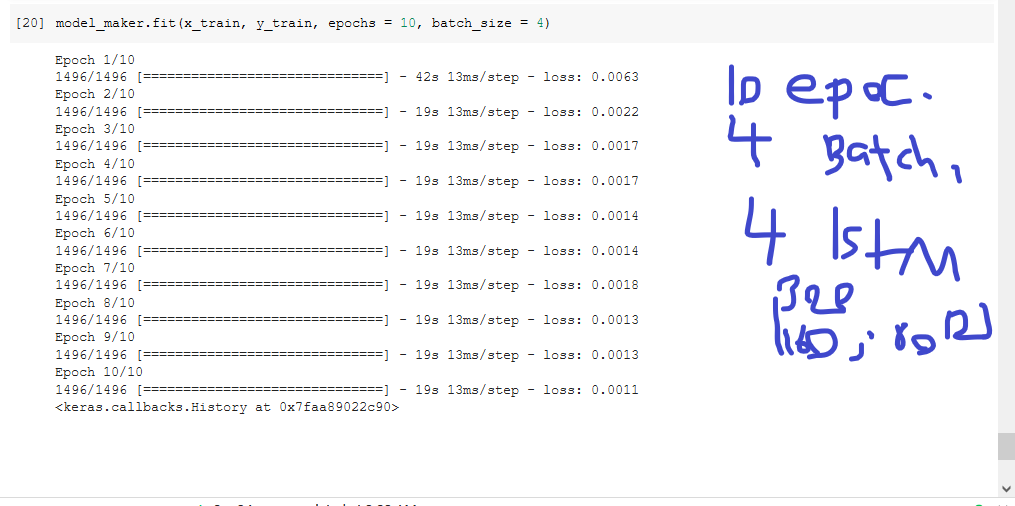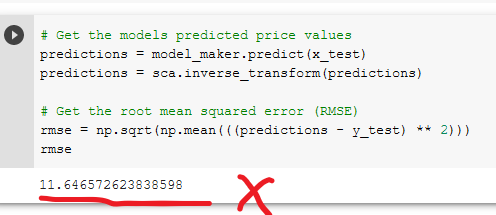

In [ ]:
# Initialising the RNN
model_maker = Sequential()
# Adding the first LSTM layer
model_maker.add(LSTM(units = 320, return_sequences = True, input_shape= (x_train.shape[1], 1)))
model_maker.add(Dropout(0.2))
# Adding a second LSTM layer
model_maker.add(LSTM(units = 160, return_sequences = True))
model_maker.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_maker.add(LSTM(units = 80 , return_sequences = True))
model_maker.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_maker.add(LSTM(units = 80))
model_maker.add(Dropout(0.2))
# Adding the output layer
model_maker.add(Dense(units = 1))
# Compiling the RNN
model_maker.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_maker.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 60, 320)           412160    
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 320)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 60, 160)           307840    
_________________________________________________________________
dropout_31 (Dropout)         (None, 60, 160)           0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 60, 80)            77120     
_________________________________________________________________
dropout_32 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 80)               

And

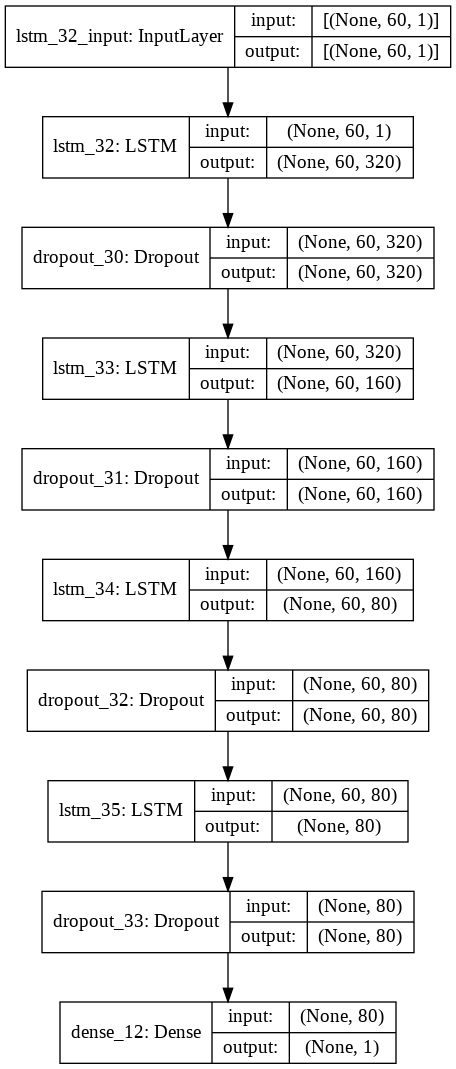

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_maker, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

We try different structure.

In [ ]:
model_maker.fit(x_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
599/599 [==============================] - 14s 14ms/step - loss: 0.0053
Epoch 2/30
599/599 [==============================] - 9s 14ms/step - loss: 0.0020
Epoch 3/30
599/599 [==============================] - 8s 14ms/step - loss: 0.0019
Epoch 4/30
599/599 [==============================] - 9s 15ms/step - loss: 0.0014
Epoch 5/30
599/599 [==============================] - 9s 14ms/step - loss: 0.0013
Epoch 6/30
599/599 [==============================] - 9s 14ms/step - loss: 0.0014
Epoch 7/30
599/599 [==============================] - 9s 14ms/step - loss: 0.0011
Epoch 8/30
599/599 [==============================] - 9s 15ms/step - loss: 0.0011
Epoch 9/30
599/599 [==============================] - 9s 14ms/step - loss: 0.0011
Epoch 10/30
599/599 [==============================] - 9s 14ms/step - loss: 8.4530e-04
Epoch 11/30
599/599 [==============================] - 9s 14ms/step - loss: 9.0816e-04
Epoch 12/30
599/599 [==============================] - 9s 14ms/step - loss: 9.7598e-04


And Now we must prepare our test dataset and test our algorithm.

In [ ]:

# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[train_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = pd1_new[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



We test our network and then find its error by RMSE.

In [ ]:
# Get the models predicted price values
predictions = model_maker.predict(x_test)
predictions = sca.inverse_transform(predictions)

# Get the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.4942144109496305

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


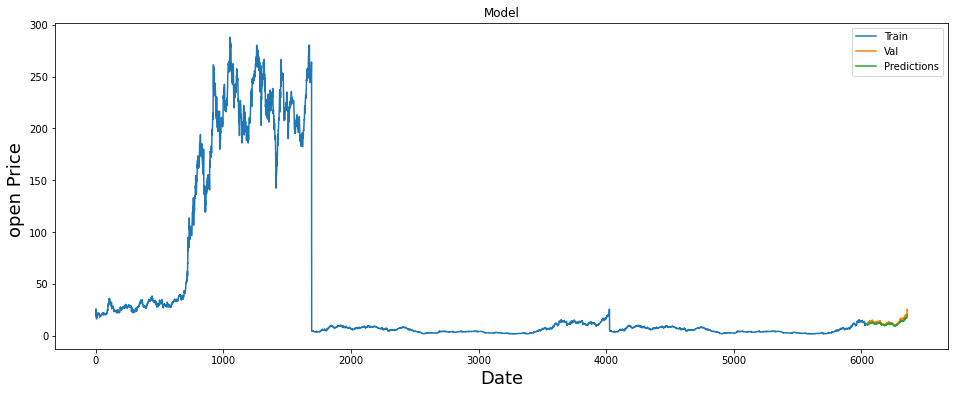

In [ ]:
# Plot the data
train = pd1_without[:train_len ]
valid = pd1_without[train_len :]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('open Price ', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()